# **A/B Testing using Python**

#### A/B Testing is a statistical method to compare two versions (A and B) of a product/feature/marketing strategy and determine which performs better.

 **Objective**

The goal of this project is to perform **A/B Testing** on two marketing campaigns to determine which campaign performs better in terms of **user engagement** or **conversions**.

-  **Control Group (Campaign A):** Users who were exposed to the **existing marketing strategy**.
-  **Test Group (Campaign B):** Users who received a **new marketing strategy**.

By performing **statistical analysis**, we will check if the new strategy (**Test Campaign**) leads to a **significant improvement** over the **Control Campaign**.


#### Dataset Overview 

- Two Campaigns: **Control Campaign** and **Test Campaign**
- Daily records of marketing performance
- Goal: **Find which campaign gets more customers**


Dataset was originally published by İlker Yıldız on Kaggle.This dataset contains daily performance data of two marketing campaigns (**Control** and **Test**). Key features include:

| Feature | Description |
|----------|-------------|
| Campaign Name | Campaign type (Control/Test) |
| Date | Record date |
| Spend | Ad spend in USD |
| Impressions | Total ad views |
| Reach | Unique users reached |
| Website Clicks | Number of clicks to website |
| Searches | Users who searched |
| View Content | Users who viewed product pages |
| Add to Cart | Users who added items to cart |
| Purchase | Number of purchases |


#### Importing Libraries

In [4]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

#### Load Data

In [8]:

import plotly.io as pio

# Optional: Setting plotly theme
pio.templates.default = "plotly_white"

# Correct file paths
control_data = pd.read_csv(r"D:\My_Study_Material\Product Analyst\control_group.csv", sep=";")
test_data = pd.read_csv(r"D:\My_Study_Material\Product Analyst\test_group.csv", sep=";")

# Display first few rows
control_data.head(), test_data.head()


(      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
 0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
 1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
 2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
 3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
 4  Control Campaign  5.08.2019         1835               NaN       NaN   
 
    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
 0               7016.0         2290.0             2159.0            1819.0   
 1               8110.0         2033.0             1841.0            1219.0   
 2               6508.0         1737.0             1549.0            1134.0   
 3               3065.0         1042.0              982.0            1183.0   
 4                  NaN            NaN                NaN               NaN   
 
    # of Purchase  
 0          618.0  
 1          511.0  
 2    

#### Data Preparation
*The **datasets have some errors in column names**. Let’s give new column names before moving forward:*

In [9]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

*Checking, if the datasets have null values or not:*

In [10]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [11]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


While exploring the **Control Campaign** dataset, we noticed some missing values.
To keep things simple and avoid dropping any useful data, we’ll fill in the missing values with the **mean of each column**. This helps keep the data balanced without losing rows.

In [14]:
#This removes warnings and future errors while keeping your code clean and robust.

control_data["Number of Impressions"] = control_data["Number of Impressions"].fillna(control_data["Number of Impressions"].mean())
control_data["Reach"] = control_data["Reach"].fillna(control_data["Reach"].mean())
control_data["Website Clicks"] = control_data["Website Clicks"].fillna(control_data["Website Clicks"].mean())
control_data["Searches Received"] = control_data["Searches Received"].fillna(control_data["Searches Received"].mean())
control_data["Content Viewed"] = control_data["Content Viewed"].fillna(control_data["Content Viewed"].mean())
control_data["Added to Cart"] = control_data["Added to Cart"].fillna(control_data["Added to Cart"].mean())
control_data["Purchases"] = control_data["Purchases"].fillna(control_data["Purchases"].mean())


In [17]:
# Creating a new dataset by merging both datasets:
# Merging control and test data by stacking rows (not column-wise merge)
ab_data = pd.concat([control_data, test_data], axis=0)

# Sorting by date and resetting index
ab_data = ab_data.sort_values(by="Date").reset_index(drop=True)

# Displaying first few rows
print(ab_data.head())


      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  
3          2277.0             2475.0          1984.0         1629.0      734.0  
4          3750.0             2893.0          2617.0         1075.0      668.0  


In [18]:
#  Checking,if the dataset has an equal number of samples about both campaigns:
print(ab_data["Campaign Name"].value_counts())

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64


*The dataset has **30 samples for each campaign**. Now let’s start with A/B testing to find the best marketing strategy.*

### **A/B Testing to Find the Best Marketing Strategy**

*Getting started by analyzing the **relationship between the number of impressions** we got from both campaigns and the amount spent on both campaigns:*

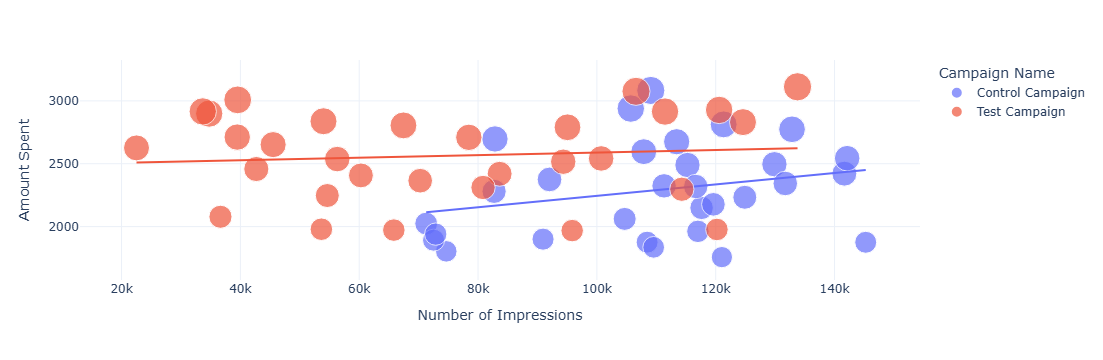

In [20]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The **control campaign generated more impressions** per dollar spent.
*Now, let's check how both campaigns performed in terms of website searches — did more visibility actually lead to more engagement?*

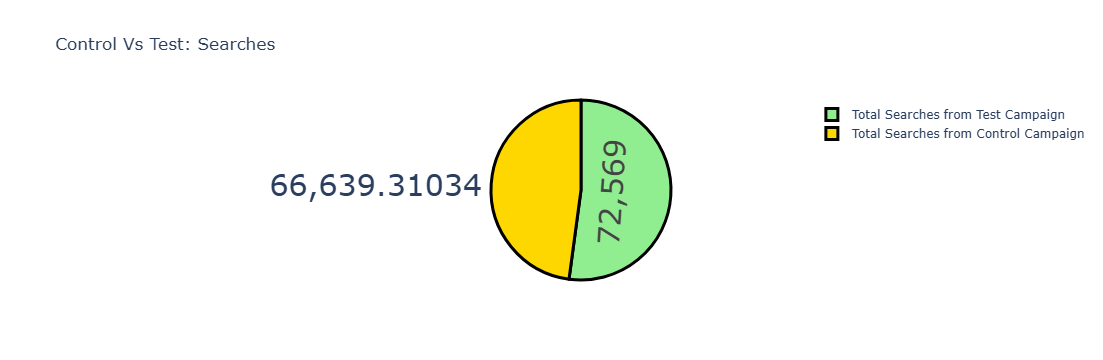

In [21]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), 
          sum(test_data["Searches Received"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The **test campaign** drove **more website searches**, showing stronger user interest. *Next, let's see how this translated into actual **website clicks** — did interest convert into action?*

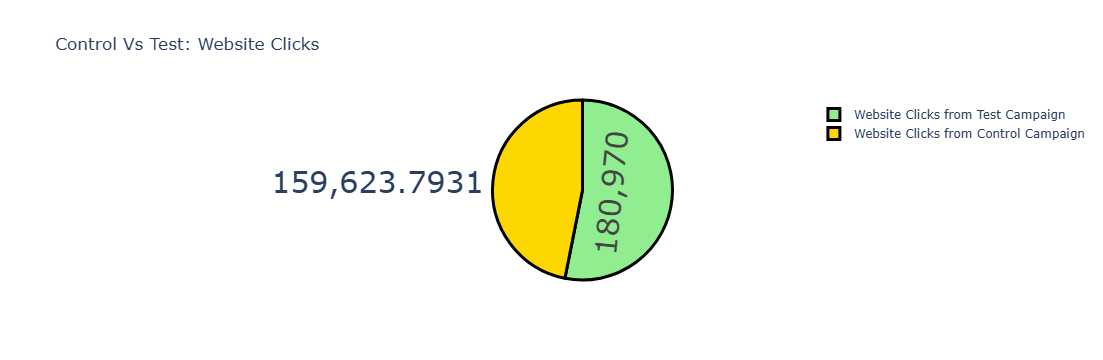

In [22]:
label = ["Website Clicks from Control Campaign", 
         "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), 
          sum(test_data["Website Clicks"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The **test campaign** leads in **website clicks**, indicating better engagement.
 Let’s now check the next step — *how much **content was actually viewed** after users landed on the website from each campaign.*

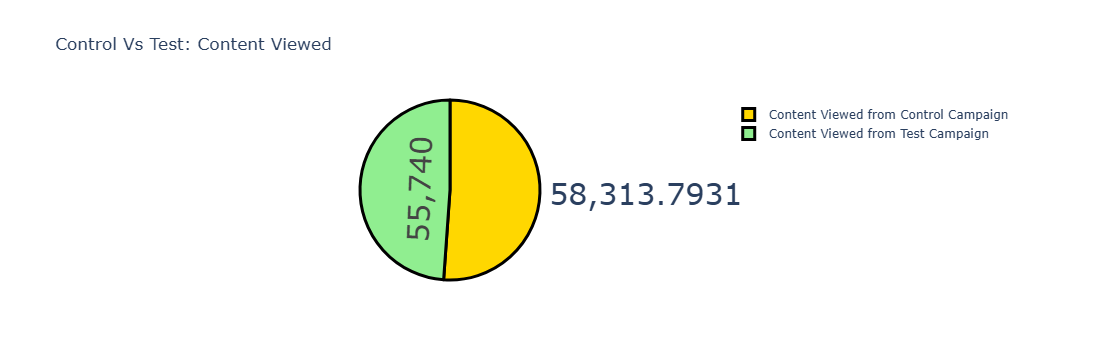

In [23]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), 
          sum(test_data["Content Viewed"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Even with **fewer clicks**, the **control campaign** resulted in **slightly more content views**, showing **stronger on-site engagement**.
Next, *let’s see if this deeper engagement translated into **more products being added to the cart**.*

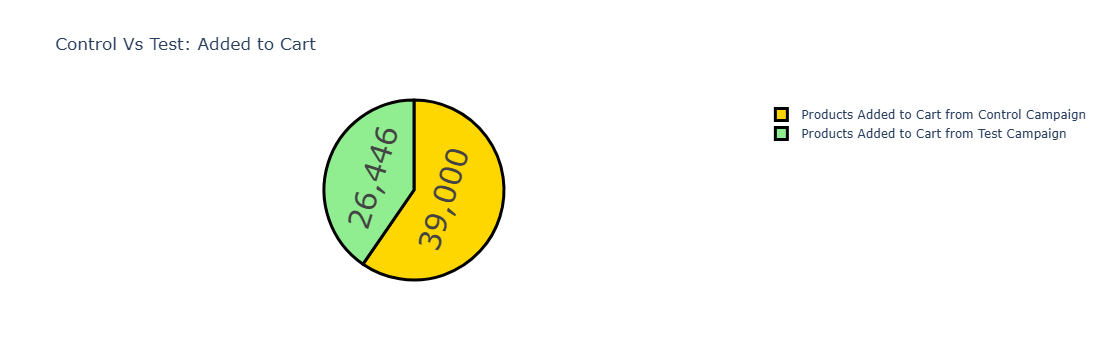

In [24]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Added to Cart')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Despite fewer clicks, the **control campaign** led to **more products being added to the cart**, highlighting better purchase intent.
 Now, *let’s compare the **spending** on both campaigns to see which delivered **better value for money**.*

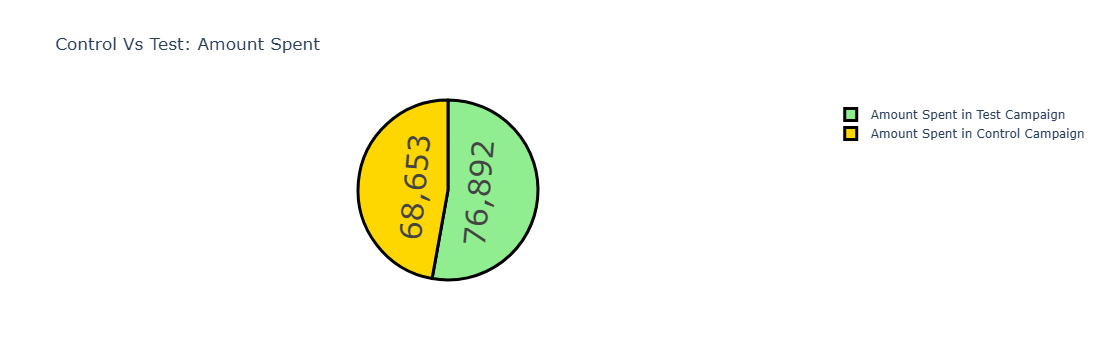

In [25]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The **test campaign** had **higher spending**, but the **control campaign** drove **more content views** and **cart additions**, making it **more cost-efficient** overall.

*Let’s now check the most important metric — **purchases made** through each campaign.*

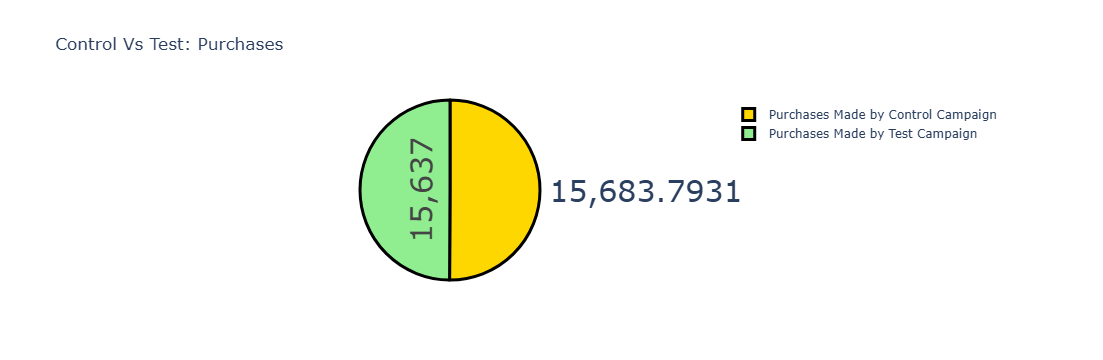

In [26]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The **difference in purchases** between both campaigns is just around **1%**, but since the **control campaign** achieved **more sales with less spending**, it’s the **clear winner** in terms of efficiency.

*Now, let’s dive deeper into the **conversion journey** — starting with the relationship between **website clicks** and **content views** for both campaigns to see which one **drives better engagement after clicks**.*


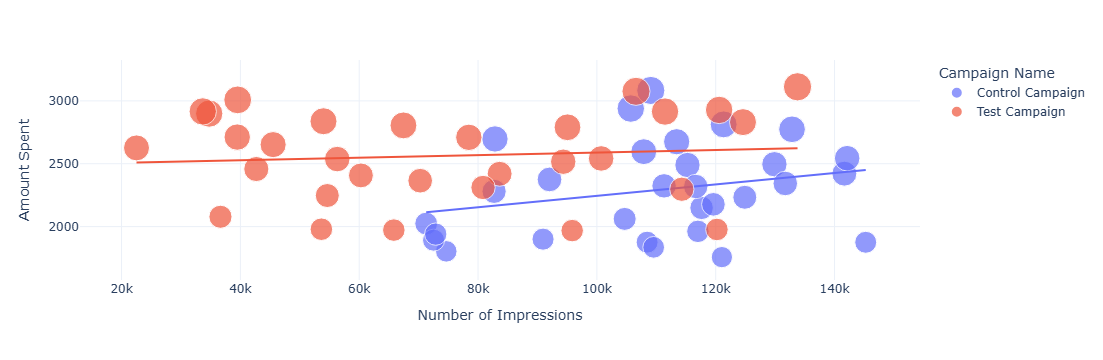

In [27]:
igure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

While the **test campaign** got **more clicks**, the **control campaign** turned those clicks into **better engagement**, making it the **stronger performer**.

*Next, I’ll check the link between **content views** and **products added to cart** — which campaign better **converted interest into purchase intent**.*

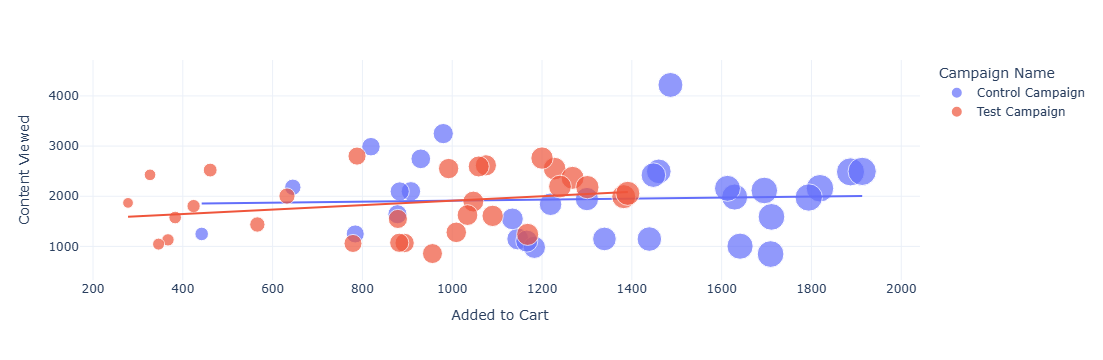

In [28]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Again, **the control campaign wins!**
*Now let’s have a look at the **relationship between the number of products added to the cart and the number of sales from both campaigns:***

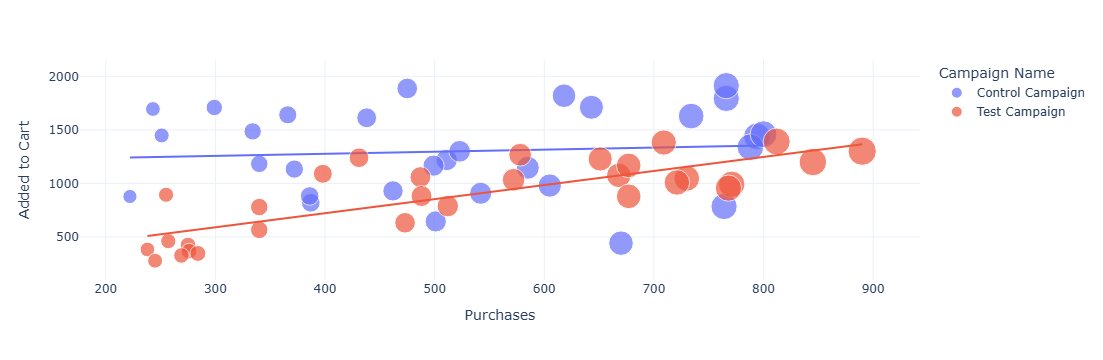

In [29]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Although the **control campaign** led to **more total sales** and **more cart additions**, the **test campaign** shows a **higher conversion rate**, meaning it **converted a higher percentage of engaged users into buyers**.

###  **Conclusion & Insights**

From our A/B test, here’s what we learned:

- **Control Campaign** → More **overall engagement** and **total sales**, making it ideal for **bigger reach** and **multi-product promotions**.
- **Test Campaign** → **Fewer overall sales** but a **higher conversion rate**, meaning it’s better at **turning interest into purchases**, especially for **specific products**.

---

###  **Key Insights:**
- The **control campaign** works best when the goal is to **maximize visibility and volume**.
- The **test campaign** is more effective for **focused targeting**, helping to **convert a niche audience** more efficiently.
-  Combining both strategies can help balance between **wider reach** and **higher conversion efficiency**.

 **Final Takeaway**:  
 Use **Control** for **broad marketing**, and **Test** when you want **efficient conversions on select products**.


*Thank you for reading till end !*